<a href="https://colab.research.google.com/github/AngeMervaneJdev/ML_AI_1/blob/main/IRIS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Probleme 1\n')


import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

# formation de la dataFrame avec dfX et dfY
data = load_iris()
Y=data.target
X=data.data

dfX=pd.DataFrame(data=X,columns=["sepal_length","sepal_width","petal_length","petal_width"])
dfY=pd.DataFrame(data=Y,columns=["Species"])

basic_data_frame=pd.concat([dfX,dfY],axis=1)

# Versicolor = 1
# Setosa = 0
# Virginica = 2


# extraction des données 1
sepal_petal=dfX[["sepal_length","petal_length"]] 

# extraction des données 2
verginica_versicolor=dfY.loc[(dfY.Species==1)|(dfY.Species==2)]


print(verginica_versicolor)
print(sepal_petal)

In [ ]:
print("Probleme 2\n")

# obtain final dataset
df=pd.concat([verginica_versicolor,sepal_petal],axis=1)
df=df.loc[(df.Species==1)|(df.Species==2)]
print(df.head)

# import seaborn as sns

sns.set(font_scale=1, rc={'figure.figsize':(6, 5)})

# drawing  scatterplots
plt.clf()
plt.scatter(x=df.sepal_length.loc[df.Species==1],y=df.petal_length.loc[df.Species==1])
plt.scatter(x=df.sepal_length.loc[df.Species==2],y=df.petal_length.loc[df.Species==2])
plt.legend()
plt.show()
plt.clf()


# drawing  boxplot
fig, axes =plt.subplots(1, 2,figsize=(16,6))

sns.boxplot(y="petal_length",x="Species",data=df, orient='v', ax=axes[0])
sns.boxplot(y="sepal_length",x="Species",data=df, orient='v', ax=axes[1])

plt.show()
plt.clf()

# drawing  violinplot
fig, axes =plt.subplots(1, 2,figsize=(16,6))
sns.violinplot(y="sepal_length",x= "Species", data=df,  orient='v' , ax=axes[0])
sns.violinplot(y="petal_length",x= "Species", data=df,  orient='v' , ax=axes[1])

In [ ]:
print("Probleme 3\n")
from sklearn.model_selection import train_test_split

X = np.array(df[["sepal_length","petal_length"]])

#varibles objectives
y = np.array(df["Species"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train)
print('*'*20)
print(X_test)


In [ ]:
print("Probleme 4\n")
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
print('Probleme 5\n')
from sklearn.neighbors import KNeighborsClassifier


# neighbord 1
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train,y_train)

print("\n\n")
print(knn1.predict(X_test))

# neighbord 3
knn3 = KNeighborsClassifier(n_neighbors=3)

knn3.fit(X_train,y_train)

print("\n\n")
print('*'*20)
print(knn3.predict(X_test))

# neighbord 5

knn5 = KNeighborsClassifier(n_neighbors=5)

knn5.fit(X_train,y_train)
print('*'*20)
print("\n\n")

y_pred=knn5.predict(X_test)
print(y_pred)

In [ ]:
print("Probleme 6\n")

from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import *
### question 1

# accuracy_score
print("accuracy_score : " +str(accuracy_score(y_test,y_pred)))

# precision
print("precision : "+str(precision_score(y_test, y_pred, average='macro')))

# recall_core
print("recal score : "+str(recall_score(y_test, y_pred, average='micro')))

# f1_score
print("f1_score : "+str(f1_score(y_test, y_pred, average='macro')))

#### question 2

print('Matrice de confusion')
print(confusion_matrix(y_test, y_pred))

#### questionn 3


* Accuracy_score

Dans la classification multiétiquette, cette fonction calcule la précision du sous-ensemble : l'ensemble d'étiquettes prédit pour un échantillon doit correspondre exactement à l'ensemble d'étiquettes correspondant dans y_true.

* Precision_score

La précision est le rapport où est le nombre de vrais positifs et le nombre de faux positifs. La précision est intuitivement la capacité du classificateur à ne pas étiqueter comme positif un échantillon qui est négatif.tp / (tp + fp)tpfp

La meilleure valeur est 1 et la pire valeur est 0.

* Recall_score

Le rappel est le rapport où est le nombre de vrais positifs et le nombre de faux négatifs. Le rappel est intuitivement la capacité du classificateur à retrouver tous les échantillons positifs.tp / (tp + fn)tpfn

* f1_score

Le score F1 peut être interprété comme une moyenne harmonique de la précision et du rappel, où un score F1 atteint sa meilleure valeur à 1 et son pire score à 0. La contribution relative de la précision et du rappel au score F1 est égale. La formule du score F1 est la suivante :

F1 = 2 * (precision * recall) / (precision + recall)


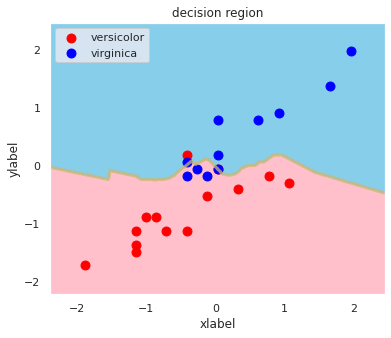

In [8]:
print("Probleme 7\n")

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    2値分類を2次元の特徴量で学習したモデルの決定領域を描く。
    背景の色が学習したモデルによる推定値から描画される。
    散布図の点は訓練データまたは検証データである。
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        特徴量
    y : ndarray, shape(n_samples,)
        ラベル
    model : object
        学習したモデルのインスンタスを入れる
    step : float, (default : 0.1)
        推定値を計算する間隔を設定する
    title : str
        グラフのタイトルの文章を与える
    xlabel, ylabel : str
        軸ラベルの文章を与える
    target_names= : list of str
        凡例の一覧を与える
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(np.unique(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

decision_region(X_test, y_test, knn5)
decision_region(X_test, y_test, knn3)

Probleme 8





********************
Evaluation




accuracy_score : 0.84
precision : 0.8376623376623377
recal score : 0.84
f1_score : 0.8376623376623377
Matrice de confusion
[[12  2]
 [ 2  9]]



accuracy_score : 0.84
precision : 0.8376623376623377
recal score : 0.84
f1_score : 0.8376623376623377
Matrice de confusion
[[12  2]
 [ 2  9]]



accuracy_score : 0.84
precision : 0.8506944444444444
recal score : 0.84
f1_score : 0.8333333333333333
Matrice de confusion
[[13  1]
 [ 3  8]]



accuracy_score : 0.8
precision : 0.8198529411764706
recal score : 0.8
f1_score : 0.7877758913412564
Matrice de confusion
[[13  1]
 [ 4  7]]




********************
Visualisation



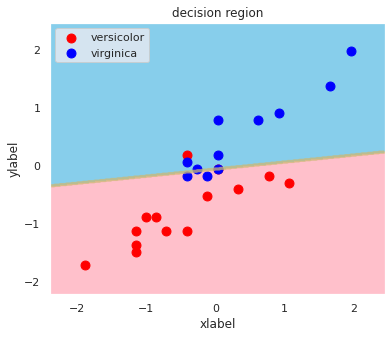

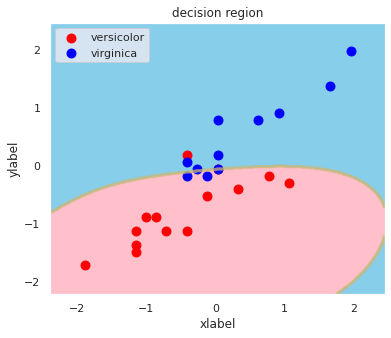

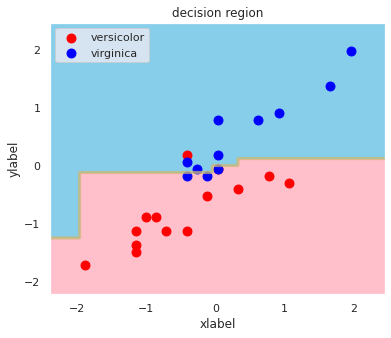

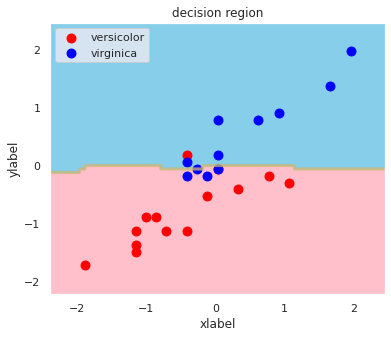

In [12]:
print('Probleme 8\n')
from sklearn.linear_model import LogisticRegression
# neighbord
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
Y_preds=[]
Clfs=[]



#----------------Logistique regression----------------------
clf1 = LogisticRegression(random_state=0).fit(X_train,y_train) 
y_pred1 = clf1.predict(X_test)
Y_preds.append(y_pred1)
Clfs.append(clf1)
## evaluation


#-------------------------SVC------------------------------
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train,y_train) 
Clfs.append(clf2)

y_pred2=clf2.predict(X_test)
Y_preds.append(y_pred2)

#----------------------Decision tree------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf3 = DecisionTreeClassifier(random_state=0).fit(X_train,y_train) 
Clfs.append(clf3)
y_pred3=clf3.predict(X_test)
Y_preds.append(y_pred3)


#---------------------Random forest-----------------------------------
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf4 = RandomForestClassifier(max_depth=2, random_state=0).fit(X_train,y_train) 
Clfs.append(clf4)
y_pred4=clf4.predict(X_test)
Y_preds.append(y_pred4)



print('\n'*3)
print("*"*20)
print('Evaluation\n')
#### Evaluation
for y_pred in Y_preds:
    # accuracy_score
    print("\n"*2)
    print("accuracy_score : " +str(accuracy_score(y_test,y_pred)))

    # precision
    print("precision : "+str(precision_score(y_test, y_pred, average='macro')))

    # recall_core
    print("recal score : "+str(recall_score(y_test, y_pred, average='micro')))

    # f1_score
    print("f1_score : "+str(f1_score(y_test, y_pred, average='macro')))
    # confusion matrix
    print('Matrice de confusion')
    print(confusion_matrix(y_test, y_pred))



print('\n'*3)
print("*"*20)
print('Visualisation\n')
#### Visualisation
for knn in Clfs:
  decision_region(X_test, y_test, knn)


In [ ]:
print('Problème 9\n')

